# keras_example

In [1]:
import keras

Using TensorFlow backend.


In [2]:
import tensorflow

## 参考
- https://keras.io/ja/
- https://keras.io/

## モジュール性
- モデルとは、できるだけ制約を少なく接続可能
- 完全構成可能な独立したモジュールのシーケンスまたはグラフとして理解されています。

### ニューラルネットワーク
すべて新しいモデルを作成するために組み合わせられる独立したモジュールです。

- 層
- 損失関数
- 最適化
- 初期化
- 活性化関数
- 正規化


## SequentialモデルでKerasに触れてみよう
- Sequential (系列) モデルは層を積み重ねたもの。
- Sequential モデルはコンストラクタに層のインスタンスのリストを与えることで作れる
- 単純に .add() メソッドを用いて層を追加できる。


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_dim=784),
    Activation('relu'),
])
model.add(Dense(10))
model.add(Activation('softmax'))
model

## モデルの可視化
- https://keras.io/ja/visualization/

In [7]:
!pip freeze | grep pydot

pydot-ng==1.0.0


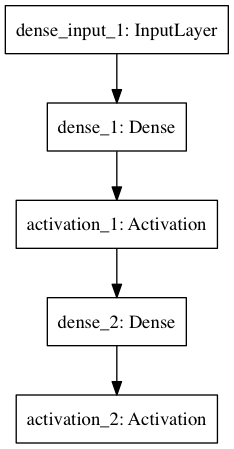

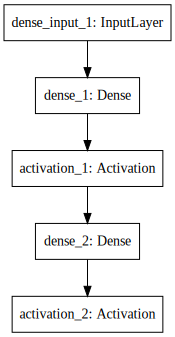

In [15]:
from IPython.display import Image, display, SVG
from keras.utils.visualize_util import plot
from keras.utils.visualize_util import model_to_dot

# plot using model_to_dot
plot(model, to_file='model.png')
display(Image("model.png"))

SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [16]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 32)            25120       dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 32)            0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            330         activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_____________________

In [32]:
Sequential.from_config(model.get_config()).set_weights(model.get_weights())


In [28]:
import yaml
import io
import json
json.loads(model.to_json()) == yaml.load(io.StringIO(model.to_yaml()))

False

In [36]:
from keras.models import model_from_json, model_from_yaml, model_from_config


In [37]:
model.save_weights("model_weights_hdf5")

In [64]:
!ls -lh *hdf*

-rw-r--r-- 1 knt staff 107K  2 17 04:17 model_weights_hdf5


In [79]:
# https://github.com/h5py/h5py
import h5py
with h5py.File("model_weights_hdf5", "r") as h5:
    print(type(h5), h5.name)
    for k, v in h5.items():
        print(k, v, type(v), v.name)
    print("-"*10)

    h5.visit(print)
    print("-"*10)

    print(list(h5.attrs))
    print(h5.attrs["layer_names"])
    #h5.attrs["new_attr"] = "values"
    #print(list(h5.attrs), h5.attrs["new_attr"])
    print("-"*10)

    print(list(h5["/activation_1"].values()))
    print(h5.get("/dense_1"))
    print(h5.get("/dense_3", "default"))
    print(list(h5["/dense_1"].values()))
    print("-"*10)
    print(h5["/dense_1/dense_1_b:0"].value)
    

<class 'h5py._hl.files.File'> /
activation_1 <HDF5 group "/activation_1" (0 members)> <class 'h5py._hl.group.Group'> /activation_1
activation_2 <HDF5 group "/activation_2" (0 members)> <class 'h5py._hl.group.Group'> /activation_2
dense_1 <HDF5 group "/dense_1" (2 members)> <class 'h5py._hl.group.Group'> /dense_1
dense_2 <HDF5 group "/dense_2" (2 members)> <class 'h5py._hl.group.Group'> /dense_2
----------
activation_1
activation_2
dense_1
dense_1/dense_1_W:0
dense_1/dense_1_b:0
dense_2
dense_2/dense_2_W:0
dense_2/dense_2_b:0
----------
['layer_names']
[b'dense_1' b'activation_1' b'dense_2' b'activation_2']
----------
[]
<HDF5 group "/dense_1" (2 members)>
default
[<HDF5 dataset "dense_1_W:0": shape (784, 32), type "<f4">, <HDF5 dataset "dense_1_b:0": shape (32,), type "<f4">]
----------
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [88]:
import numpy as np

In [130]:
with h5py.File("file.hdf5", "w") as f:
    dset = f.create_dataset("mydataset", shape=(100,), dtype='i', data=np.arange(100))
    print(type(dset), dset, dset.name, dset.shape)
    print(dset.value, type(dset.value))
    print(dset[0:2])
    print("-"*10)

    group = f.create_group("group")
    print(type(group), group, group.name)
    print("-"*10)

    dset2 = group.create_dataset("another_dataset", data=np.arange(6).reshape(2, 3), dtype="f")
    dset2
    print(type(dset2), dset2, dset2.name, dset2[0, 1])
    print("-"*10)

    sub_group = group.create_group("sub_group")
    sub_group["v1_ndarray"] = np.array([1.0])
    sub_group["v2_float"] = 2.0
    sub_group["v3_int"] = 3
    print(type(sub_group), sub_group, sub_group.name)
    print("-"*10)

    soft_link = h5py.SoftLink("/group")
    external_link = h5py.ExternalLink("model_weights_hdf5", "/dense_1/dense_1_b:0")
    print(type(soft_link), soft_link, soft_link.path)
    print(type(external_link), external_link, external_link.path, external_link.filename)
    print("-"*10)

    sub_group["alias_group"] = soft_link
    sub_group['ext_link'] = external_link
    print(type(sub_group["alias_group"]), sub_group["alias_group"])
    print(type(sub_group["ext_link"]), sub_group["ext_link"])
    print("-"*10)

    f.visit(print)
    print("-"*10)


<class 'h5py._hl.dataset.Dataset'> <HDF5 dataset "mydataset": shape (100,), type "<i4"> /mydataset (100,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99] <class 'numpy.ndarray'>
[0 1]
----------
<class 'h5py._hl.group.Group'> <HDF5 group "/group" (0 members)> /group
----------
<class 'h5py._hl.dataset.Dataset'> <HDF5 dataset "another_dataset": shape (2, 3), type "<f4"> /group/another_dataset 1.0
----------
<class 'h5py._hl.group.Group'> <HDF5 group "/group/sub_group" (3 members)> /group/sub_group
----------
<class 'h5py._hl.group.SoftLink'> <SoftLink to "/group"> /group
<class 'h5py._hl.group.ExternalLink'> <ExternalLink to "/dense_1/dense_1_b:0" in file "model_weights_hdf5" /dense_1/dense_1_b:0 model_weights_hdf5
----------
<class '

In [132]:
import pandas as pd
import seaborn as sns
from IPython.display import display

titanic = sns.load_dataset("titanic")
titanic.head(2)


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   

     who adult_male deck  embark_town alive  alone  
0    man       True  NaN  Southampton    no  False  
1  woman      False    C    Cherbourg   yes  False

In [160]:
# http://pandas.pydata.org/pandas-docs/stable/io.html#hdf5-pytables
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_hdf.html
with pd.HDFStore('titanic_head_export.h5', mode="w") as store_export:
    print(store_export)
    print("-"*10)

    store_export.append('key', titanic.head())
    store_export.append('key', titanic.tail(), data_columns=titanic.columns)
    print(store_export)
    print("-"*10)
    
    store_export.remove('key')
    store_export.put('key2/sub', titanic.tail(), data_columns=titanic.columns, format="table")
    store_export.append('key2/sub', titanic.tail())
    print(store_export)
    print("-"*10)

    display(store_export["key2/sub"].head(2))
    display(store_export.select("key2/sub").tail(2))
    

<class 'pandas.io.pytables.HDFStore'>
File path: titanic_head_export.h5
Empty
----------
<class 'pandas.io.pytables.HDFStore'>
File path: titanic_head_export.h5
/key                                     frame_table  (typ->appendable,nrows->10,ncols->15,indexers->[index])           
/key/meta/values_block_0/meta            series_table (typ->appendable,nrows->3,ncols->1,indexers->[index],dc->[values])
/key/meta/values_block_1/meta            series_table (typ->appendable,nrows->7,ncols->1,indexers->[index],dc->[values])
----------


/Users/knt/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/tables/path.py:118: NaturalNameWarning: object name is a Python keyword: 'class'; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  % (name, _warnInfo), NaturalNameWarning)


<class 'pandas.io.pytables.HDFStore'>
File path: titanic_head_export.h5
/key2/sub                            frame_table  (typ->appendable,nrows->10,ncols->15,indexers->[index],dc->[survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone])
/key2/sub/meta/class/meta            series_table (typ->appendable,nrows->3,ncols->1,indexers->[index],dc->[values])                                                                                               
/key2/sub/meta/deck/meta             series_table (typ->appendable,nrows->7,ncols->1,indexers->[index],dc->[values])                                                                                               
----------


survived  pclass     sex   age  sibsp  parch  fare embarked   class  \
886         0       2    male  27.0      0      0  13.0        S  Second   
887         1       1  female  19.0      0      0  30.0        S   First   

       who adult_male deck  embark_town alive alone  
886    man       True  NaN  Southampton    no  True  
887  woman      False    B  Southampton   yes  True

survived  pclass   sex   age  sibsp  parch   fare embarked  class  who  \
889         1       1  male  26.0      0      0  30.00        C  First  man   
890         0       3  male  32.0      0      0   7.75        Q  Third  man   

    adult_male deck embark_town alive alone  
889       True    C   Cherbourg   yes  True  
890       True  NaN  Queenstown    no  True

In [144]:
titanic.head().to_hdf("titanic_head.hdf5", "key_hdf", mode="w", format="table")
titanic_df = pd.read_hdf("titanic_head.hdf5")
display(titanic_df)

with h5py.File("titanic_head.hdf5", mode="r") as titanic_hdf:
    titanic_hdf.visit(print)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who adult_male deck  embark_town alive  alone  
0    man       True  NaN  Southampton    no  False  
1  woman      False    C    Cherbourg   yes  False  
2  woman      False  NaN  Southampton   yes   True  
3  woman      False    C  Southampton   yes  False  
4    man       True  NaN  Southampton    no   True

key_hdf
key_hdf/_i_table
key_hdf/_i_table/index
key_hdf/_i_table/index/abounds
key_hdf/_i_table/index/bounds
key_hdf/_i_table/index/indices
key_hdf/_i_table/index/indicesLR
key_hdf/_i_table/index/mbounds
key_hdf/_i_table/index/mranges
key_hdf/_i_table/index/ranges
key_hdf/_i_table/index/sorted
key_hdf/_i_table/index/sortedLR
key_hdf/_i_table/index/zbounds
key_hdf/meta
key_hdf/meta/values_block_0
key_hdf/meta/values_block_0/meta
key_hdf/meta/values_block_0/meta/_i_table
key_hdf/meta/values_block_0/meta/_i_table/index
key_hdf/meta/values_block_0/meta/_i_table/index/abounds
key_hdf/meta/values_block_0/meta/_i_table/index/bounds
key_hdf/meta/values_block_0/meta/_i_table/index/indices
key_hdf/meta/values_block_0/meta/_i_table/index/indicesLR
key_hdf/meta/values_block_0/meta/_i_table/index/mbounds
key_hdf/meta/values_block_0/meta/_i_table/index/mranges
key_hdf/meta/values_block_0/meta/_i_table/index/ranges
key_hdf/meta/values_block_0/meta/_i_table/index/sorted
key_hdf/meta/values_block_0/met

### 入力の形を指定する
- 最初の層では入力の形を指定しなければならない (それ以降の層では必要ない) 。 指定する方法は複数ある:
- 最初の層にinput_shape引数を与える。これは形を表すタプル (タプルの要素は整数かNoneでNoneはどんなサイズでも良いことを表す。) input_shapeにbatchサイズは含まれない。
- 代わりにbatch_input_shape引数を与える。ここではbatchサイズが含まれる。これは固定長のbatchサイズを指定するときに便利である (例えば stateful RNN) 。
- Denseなどの一部の2Dの層では入力の形をinput_dimで指定でき、一部の3Dの層ではinput_dimとinput_lengthで指定できる。
- したがって、次の3つのコードは等価である。





```python
model = Sequential()

model.add(Dense(32, input_shape=(784,)))
model.add(Dense(32, batch_input_shape=(None, 784)))
model.add(Dense(32, input_dim=784))

# 2nd
# note that batch dimension is "None" here,
# so the model will be able to process batches of any size.

# 次の3つのコードも等価である。
model.add(LSTM(32, input_shape=(10, 64)))
model.add(LSTM(32, batch_input_shape=(None, 10, 64)))
model.add(LSTM(32, input_length=10, input_dim=64))
```

## Compile
### 最適化 optimize
最適化アルゴリズムの利用方法

https://keras.io/ja/optimizers/

### 目的関数
- https://keras.io/ja/objectives/
- https://github.com/fchollet/keras/blob/master/keras/objectives.py

#### complileのloss
- regression ?
    - mean_squared_error / mse
    - mean_absolute_error / mae
    - mean_absolute_percentage_error / mape
    - mean_squared_logarithmic_error / msle
- squared_hinge
- hinge
- binary_crossentropy
    - logloss
- categorical_crossentropy
    - multi-class-loglossとしても知られています
    - Note: この目的関数を使うには，ラベルがバイナリ配列であり，その形状が(nb_samples, nb_classes)であることが必要です．
- sparse_categorical_crossentropy
    - categorical_crossentropyと同じですが，スパースラベルを取る点で違います
    - Note: ラベルの次元と出力の次元が同じである必要があります
    - 例えば，ラベル形状を拡張するために，np.expand_dims(y, -1)を用いて新しく次元を追加する必要があるかもしれません．
- kullback_leibler_divergence
    - kld
    - 予測した確率分布Qから真の確率分布Pへの情報ゲイン．2つの分布の異なりの度合いを得る．
- poisson
    - (予測 - 正解 * log(予測))の平均
- cosine_proximity
    - 予測と正解間のコサイン近似の負の平均．
